In [30]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read the input file and check the data dimension

In [31]:
credit = pd.read_csv("..\\dataset\\german_credit.csv") 

In [32]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

credit.head()
credit.tail()
credit.info()
credit.shape
credit.isnull().sum().sum()
credit.isna().sum().sum()
credit.describe().transpose()







,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes
999,0,0 <= ... < 200 DM,45,critical account/ other credits existing (not ...,car (used),4576,100 <= ... < 500 DM,unemployed,3,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",27,none,own,1,skilled employee / official,1,none,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

(1000, 21)

0

0

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [33]:
X =  credit.drop("default", axis=1)
y =  credit["default"]

X.shape
y.shape

from sklearn.model_selection import train_test_split
X_bag1, X_bag2, Y_bag1, Y_bag2 = train_test_split(X, y, test_size=0.50, random_state=1)

(1000, 20)

(1000,)

In [34]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [35]:
# Print Shape of model data
X_bag1=pd.get_dummies(X_bag1)

X_bag1.head()
X_bag1.shape

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,40,5998,4,3,27,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
179,21,571,4,4,65,2,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
27,12,409,3,3,42,2,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
33,12,1264,4,4,57,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
334,24,4110,3,4,23,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1


(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [36]:
X_bag1.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,-0.038696,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,-0.088007,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,-0.041112,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,-0.035688,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,0.051976,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,-0.032228,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,0.000718,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,-0.165964,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,-0.172841,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.038696,-0.088007,-0.041112,-0.035688,0.051976,-0.032228,0.000718,-0.165964,-0.172841,1.000000,...,0.038410,-0.074618,-0.078234,0.000515,0.098519,0.042601,0.063004,-0.063004,-0.017373,0.017373


### Drop the original variables which are converted to dummy

In [38]:
#NA

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_bag1, Y_bag1, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [40]:
from sklearn.ensemble import RandomForestClassifier
Rf_Model=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
Rf_Model.fit(X_train, Y_train)
y_pred= Rf_Model.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [41]:
from sklearn import metrics

print('Confusion Matrix \n', metrics.confusion_matrix(Y_test, y_pred))

print('Accuracy Score ',Rf_Model.score(X_test , Y_test))

Confusion Matrix 
 [[96  8]
 [29 17]]
Accuracy Score  0.7533333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [42]:

feature_importances = pd.DataFrame(Rf_Model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                                                    importance
credit_amount                                         0.099335
age                                                   0.087813
duration_in_month                                     0.061128
account_check_status_no checking account              0.045243
installment_as_income_perc                            0.042206
present_res_since                                     0.032136
account_check_status_< 0 DM                           0.027337
purpose_car (new)                                     0.024779
credit_history_critical account/ other credits ...    0.022426
credits_this_bank                                     0.019030
present_emp_since_... < 1 year                        0.018725
property_real estate                                  0.017104
other_installment_plans_none                          0.017055
present_emp_since_1 <= ... < 4 years                  0.016542
savings_... < 100 DM                                  0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [44]:
# Use below values
num_folds = 10
seed = 77

In [45]:
#Validate the Random Forest model build above using k fold

In [46]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=1)
results = model_selection.cross_val_score(Rf_Model, X_bag1, Y_bag1, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))
cv=cross_val_score(Rf_Model, X_train, Y_train, cv=10)

Mean Square Error: 0.242 (0.075)


In [47]:
#Calculate Mean score

In [48]:
cv.mean()

0.7314285714285715

In [49]:
# Calculate score standard deviation using std()

In [51]:
cv.std()

0.040808162448816306

# Q8 Print the confusion matrix( 1 Marks)

In [52]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[96  8]
 [29 17]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.92      0.84       104
          1       0.68      0.37      0.48        46

avg / total       0.74      0.75      0.73       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

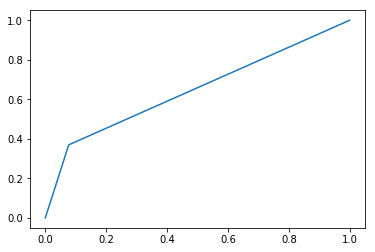

In [54]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _=roc_curve(Y_test, y_pred)
plt.plot(fpr,tpr)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [55]:
print('AUC', roc_auc_score(Y_test, y_pred))

AUC 0.6463210702341138


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [56]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, Y_train)
    Rf_Model.fit(X_, y_)
    y_pred = Rf_Model.predict(X_test)
    
    acc = accuracy_score(y_pred, Y_test)
    accuracy.append(acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())